In [1]:
from google.colab import drive
drive.mount('/content/drive') # remove the cell if colab is not used

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
base_path = Path('/content/drive/MyDrive/data') # Pass path to data folder here, e.g. Path('/content/drive/MyDrive/data') if using Google Drive

# Analiza i przetwarzanie danych na temat Titanica

#### Wyobraź sobie, że pewnego wakacyjnego dnia, będąc na plaży w pełnym słońcu, odbierasz telefon od nieznanego numeru.
Robisz to niechętnie — zasłużyłeś/aś przecież na odpoczynek i chcesz mieć ten czas tylko dla siebie. Już masz na końcu języka wymijającą odpowiedź, gdy nagle z drugiej strony słyszysz:
„Czy jesteś gotowy, by tego lata rozwikłać jedną z największych zagadek ludzkości?”

Jako osoba z natury ciekawa świata i ze świetnym umysłem analitycznym, szybko zapominasz o plaży i wakacjach. Zaintrygowany/a dopytujesz o szczegóły, ale rozmówca nie chce zdradzić zbyt wiele. Wiadomo jedynie, że chodzi o *zatonięcie Titanica w 1914* roku, a celem misji jest ustalenie, które osoby miały szansę przeżyć.

**Ty** — jako **renomowany analityk danych** — byłeś/byłaś ich pierwszym wyborem do analizy i oczyszczenia danych. Mimo wątpliwości postanawiasz podjąć się zadania, mając nadzieję, że twoja wiedza może zostać praktycznie wykorzystana w słusznym celu.

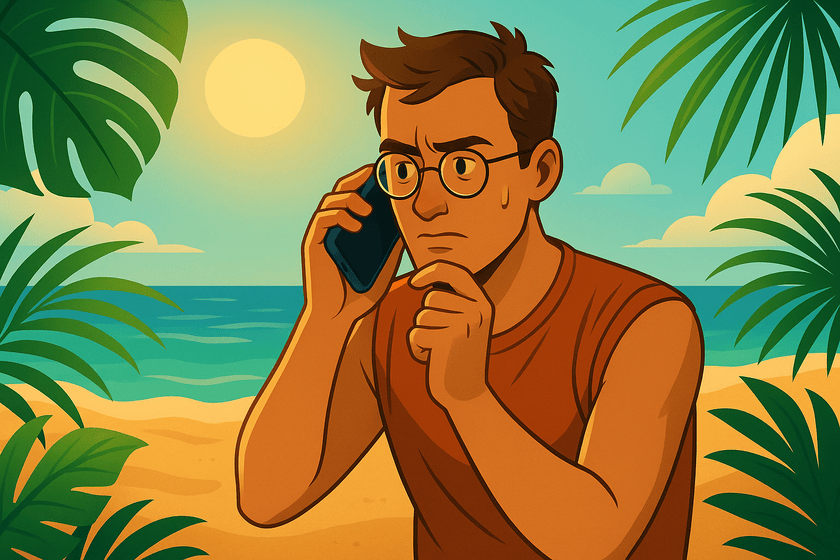

(*AI-generated image*)


#### Twoim celem będzie przeanalizowanie i przetworzenie zbioru danych w taki sposób, by mógł on być użyty do nauki modelu do klasyfikacji każdego pasażera Titanica jako ofiary (0) lub osoby, która przeżyła (1).

(Uwaga: w tym zadaniu nie będziesz trenować modeli, ta przyjemność spotka cię w następnych notebookach)

Poniżej znajdziesz pytania, które mogą być pomocne w analizie, oraz odwołania do poszczególnych sekcji z notebooka do lekcji:

- Czy wszystkie kolumny są istotne w kontekście zadania?
- Czy występują brakujące wartości? Jeśli tak, to jak je uzupełnisz? (sekcja #2.1)
- Czy typy danych są odpowiednie do znaczenia kolumny? (sekcja #1.3)
- Czy dystrybucje danych mają rozkłady normalne, czy asymetryczne? (sekcja #4.1 + wykład)
- Która zmienna oznacza predykowaną klasę?
- Jaki jest rozkład zmiennej predykowanej względem zmiennych kategorialnych, jak i numerycznych? (sekcja #4.1)
- Czy końcowe rozkłady zawierają wartości skrajne? (sekcja #4.2 + wykład)

Wymagania:

- Zbiór musi być oczyszczony, tj. finalnie nie powinien mieć brakujących wartości (sekcja #2.1)
- Zbiór musi zawierać co najmniej dwie dodatkowe kolumny, które mogą wzbogacić informacje zawarte w zbiorze (sekcje #1.5 i #2.2)
- Cechy kategorialne powinny być zakodowane, postaraj się dobrać odpowiedni sposób (sekcja #2.3)
- Zbadaj, czy występują skrajne wartości (outliery) zarówno dla wartości numerycznych, jak i dla kategorialnych
- Każda cecha powinna być zwizualizowana co najmniej raz. Sam(a) zastanów się, czy warto wizualizować cechy parami w celu odkrycia zależności między nimi (sekcja #4.4)
- Nie ma ograniczenia na liczbę komórek, ale zastanów się, czy dana wizualizacja/obliczenie jest przydatne w całej analizie, czy po prostu sobie "egzystuje" bez żadnych wniosków

Zadbaj o czytelność kodu i nazewnictwo zmiennych. Jeśli jakiś wycinek kodu się powtarza, to wyodrębnij go do funkcji. Postaraj się zamieszczać swoje wnioski w postaci komentarza `Markdown`.

Poniżej zamieszczamy tabelę z wyjaśnieniem poszczególnych kolumn:

| Kolumna      | Opis                                                                            |
| ------------ | ------------------------------------------------------------------------------- |
| **Survived** | Czy pasażer przeżył (0 = nie, 1 = tak).                                         |
| **Pclass**   | Klasa podróży (1 = I klasa, 2 = II klasa, 3 = III klasa).                       |
| **Name**     | Imię i nazwisko pasażera.                                                       |
| **Sex**      | Płeć pasażera (male = mężczyzna, female = kobieta).                             |
| **Age**      | Wiek pasażera w latach.                                                         |
| **SibSp**    | Liczba rodzeństwa i małżonków na pokładzie.                                     |
| **Parch**    | Liczba rodziców i dzieci na pokładzie.                                          |
| **Ticket**   | Numer biletu.                                                                   |
| **Fare**     | Cena biletu.                                                                    |
| **Cabin**    | Numer kabiny pasażera                                     |
| **Embarked** | Port, w którym pasażer wsiadł (C = Cherbourg, Q = Queenstown, S = Southampton). |
                                                         |


In [3]:
df = pd.read_csv(base_path / 'titanic.csv', index_col='PassengerId')
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,NaN,NaN,S


#Typy danych

In [4]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      793 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,793.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,33.123938,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,51.578312,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.925000,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.500000,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


#**Sprawa brakujących wartości**
1. **Sprawdzenie każdej kolumny co do występowania NaN**

In [5]:
def get_percentage_missing(df, axis):
  missing_rows = df.isna().sum(axis=axis)
  missing_rows_perc = np.round(missing_rows/ df.shape[axis] * 100, 2)
  return missing_rows_perc[missing_rows_perc > 0]

missing_columns = get_percentage_missing(df, axis = 0)
missing_columns

,0
Age,19.87
Fare,11.00
Cabin,77.10
Embarked,0.22


Wartości NaN wystąpiły w

*   age - 20%
*   fare - 11%
*   cabin - aż 77% ! - warto rozważyć usunięcie kolumny
*   embarked - 0.22%

2. **Sprawdzenie czy występują wiersze z dużą liczbą Nan**

In [6]:
missing_rows = get_percentage_missing(df, axis = 1)
missing_rows[missing_rows > 80]

,0
PassengerId,


Żaden wiersz nie ma dużej liczby brakujących wartości, więc nie ma potrzeby ich usuwania.

3. **Uzupełnienie kolumn z wartościami numerycznymi.**

Sprawdzenie rozkładu danych z poszczególnych kolumn z wartościami numerycznymi:


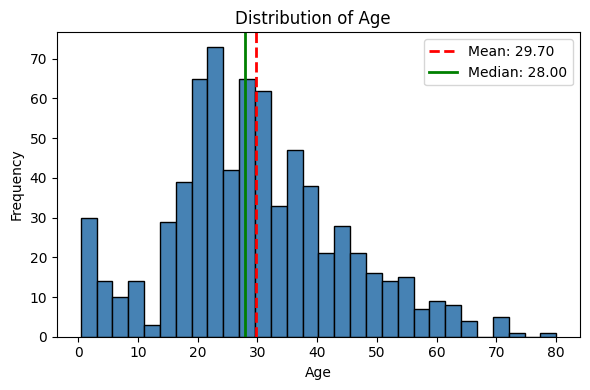

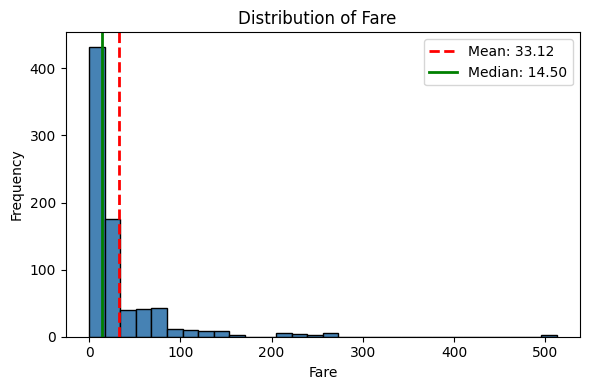

In [7]:
def plot_numeric_histogram(df, column_name, info = ''):

  data = df[column_name].dropna()

  mean_val = data.mean()
  median_val = data.median()

  plt.figure(figsize=(6, 4))
  plt.hist(data, bins=30, color='steelblue', edgecolor='black')
  plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
  plt.axvline(median_val, color='green', linestyle='-', linewidth=2, label=f'Median: {median_val:.2f}')

  plt.title(f'Distribution of {column_name} {info} ')
  plt.xlabel(column_name)
  plt.ylabel('Frequency')
  plt.legend()
  plt.tight_layout()
  plt.show()

plot_numeric_histogram(df, column_name='Age')
plot_numeric_histogram(df, column_name='Fare')

Wiek rozłożony jest asymetrycznie więc, braki zostaną uzupełnione medianą.

W przypadku opłat, warto zastanowić się, czy ich wysokosć nie jest związana z klasą podróży pasażera - aby to sprawdzić można przedstawić rozkład opłat dla każdej z klas odrębnie.

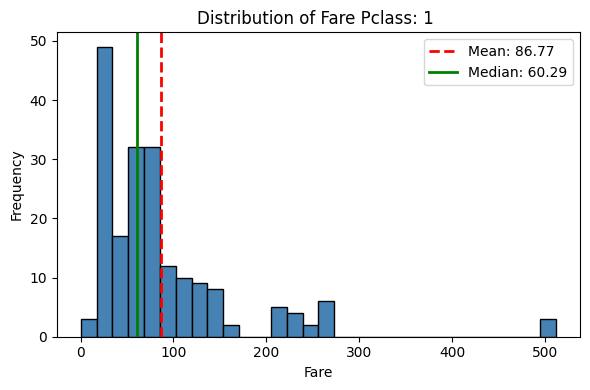

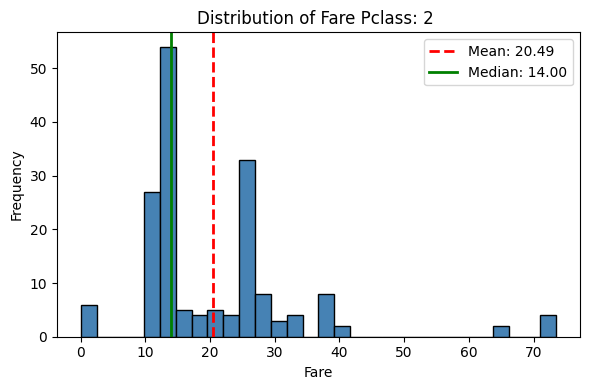

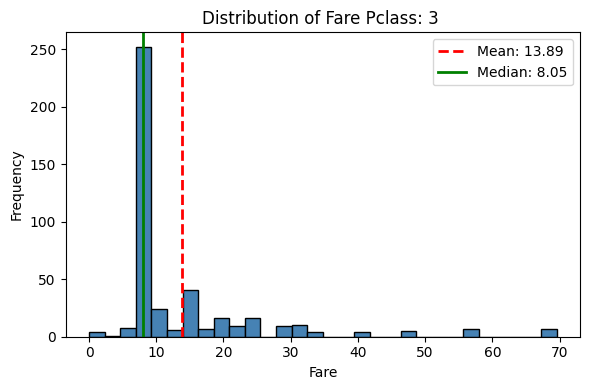

In [8]:
classList = df['Pclass'].unique()
classList.sort()

for Pclass in classList:
  plot_numeric_histogram(df[df['Pclass'] == Pclass], column_name='Fare', info = f'Pclass: {Pclass}')

W zależności od klasy podróży rozkład jest inny - można to wykorzystać przy uzupełnianiu wartości.

Przeanalizowane kolumny numeryczne zostaną uzpełnionę medianami, ponieważ wszystkie rozkłady są asymetryczne. Przy uzupełnieniu opłat mediany będą wzięte dla każdej z klas podróży oddzielnie.


Zastosowanie losowania rozkładu na podstawie istniejącego, przy okazji wieku wydaje się ryzykowane, ponieważ wiek może być jednym z czynników istotnie wpływających na to czy pasażer przeżył i mogłoby przeszkodzić w wykryciu tej zależności.

In [9]:
missing_age_vals = df['Age'].isna()
age_median = df['Age'].median()

df.loc[missing_age_vals, 'Age'] = age_median

missing_fare_vals = df['Fare'].isna()
classList = df['Pclass'].unique()

for Pclass in classList:
  fare_median = df[df['Pclass'] == Pclass]['Fare'].median()
  df.loc[missing_fare_vals & (df['Pclass'] == Pclass), 'Fare'] = fare_median



4. **Uzupełenienie pozostałych kolumn z danymi**

  By uzupełnić kategorię Embraked, najpierw można zobaczyć rozkład danych.

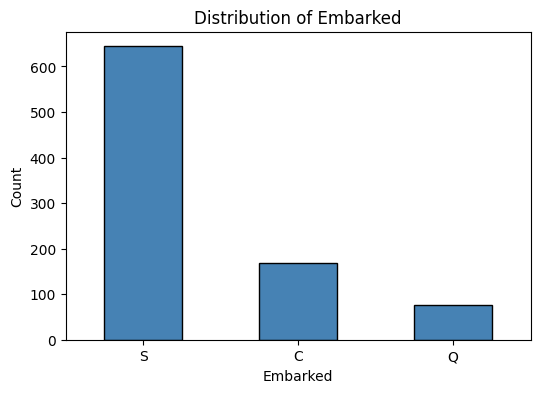

In [10]:
def plot_categorical_column(df, column_name):

    counts = df[column_name].value_counts()

    plt.figure(figsize=(6, 4))
    counts.plot(kind='bar', color='steelblue', edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

plot_categorical_column(df, 'Embarked')


Wiedząc, że wartości Nan stanowią jedynie 0.22% wszystkich wartości w kolumnie Embarked, można uzupełnić dane najczęściej występującą wartością.

In [11]:
missing_embarked_vals = df['Embarked'].isna()
embarked_mode = df['Embarked'].mode()[0]
df.loc[missing_embarked_vals, 'Embarked'] = embarked_mode


Ostanią niepełną kolumną jest Cabin. Uzupełnienie tej kolumny w oparciu o średnią, medianę, modę lub z zachowaniem rozkładu jest niemożliwe. Nie możemy powiązać kabiny z wartościami z innych kolumn, więc uzupełnienie byłoby losowe - uzupełnienie losowymi danymi 77% kolumny wydaje się bez sensu. Kolumnę cabin należy więc usunąć.

In [12]:
df.drop('Cabin', axis=1, inplace=True)

# **Usunięcie i dodanie kolumn**

1. **Usunięcie kolumn**

Kolumny które wydają się nieprzydatne w predykcji przeżycia pasażera to Name i Ticket. Każdy pasażer ma indywidualne imie i nazwisko oraz numer biletu - te atrybuty nie są związane z szansami na przeżycie.

In [13]:
df.drop('Ticket', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)


2. **Dodanie Kolumn**

Atrybuty które można stworzyć na podstawie istniejących danych:
* Alone - określa czy pasażer podróżował z członkiem rodziny czy bez - 0 lub 1
* Fitness - określa tężyznę fizyczną pasażera bazując na wieku - good, mid, bad

In [14]:
alone_fun = lambda x: 1 - min(x['SibSp'] + x['Parch'], 1)
df['Alone'] = df.apply(alone_fun, axis=1)

fitness_fun = lambda x: 'bad' if x['Age'] > 65 else ('mid' if x['Age'] > 25 else 'good')
df['Fitness'] = df.apply(fitness_fun, axis=1)

In [15]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,Fitness
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,0,good
2,1,1,female,38.0,1,0,71.2833,C,0,mid
3,1,3,female,26.0,0,0,7.9250,S,1,mid
4,1,1,female,35.0,1,0,53.1000,S,0,mid
5,0,3,male,35.0,0,0,8.0500,S,1,mid
6,0,3,male,28.0,0,0,8.4583,Q,1,mid
7,0,1,male,54.0,0,0,51.8625,S,1,mid
8,0,3,male,2.0,3,1,21.0750,S,0,good
9,1,3,female,27.0,0,2,8.0500,S,0,mid


#**Kodowanie kolumn kategorialnych i zmiana typów**
1. **Kodowanie**

Kolumna Sex zostanie zakodowana przy użyciu kodowania binarnego, Embarked przy użyciu kodowania one hot, a Fitness zostanie zakodowane z zachowaniem porządku.

In [16]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Fitness'] = df['Fitness'].map({'bad': 0, 'mid': 1, 'good': 2})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=False)

df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Alone,Fitness,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,2,False,False,True
2,1,1,1,38.0,1,0,71.2833,0,1,True,False,False
3,1,3,1,26.0,0,0,7.9250,1,1,False,False,True
4,1,1,1,35.0,1,0,53.1000,0,1,False,False,True


2. **Zmiana Typów**

 Wartości w kolumnach Survived, Sex i Alone można interpretować jako wartości logiczne.

In [17]:
df['Survived'] = df['Survived'].astype(bool)
df['Sex'] = df['Sex'].astype(bool)
df['Alone'] = df['Alone'].astype(bool)

df.head(4)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Alone,Fitness,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,False,3,False,22.0,1,0,7.2500,False,2,False,False,True
2,True,1,True,38.0,1,0,71.2833,False,1,True,False,False
3,True,3,True,26.0,0,0,7.9250,True,1,False,False,True
4,True,1,True,35.0,1,0,53.1000,False,1,False,False,True


#**Wykresy**
1.**Correlation Matrix**


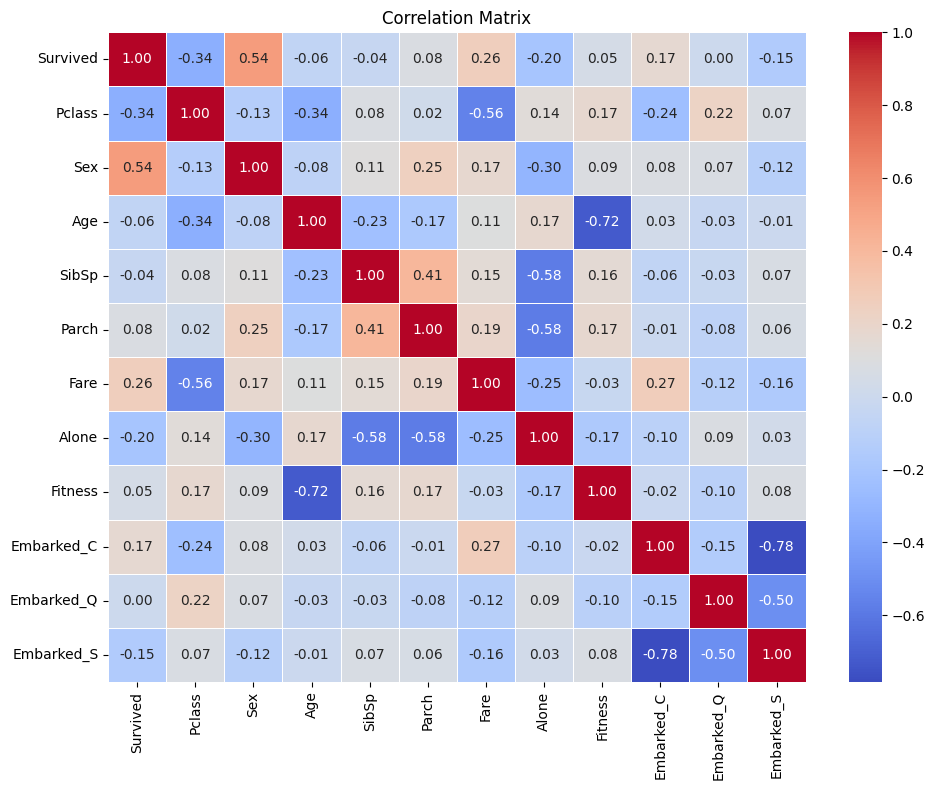

In [18]:
def plot_correlation_matrix(df):

  corr = df.corr(numeric_only=True)
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
  plt.title('Correlation Matrix')
  plt.tight_layout()
  plt.show()

plot_correlation_matrix(df)

Z macierzy korelacji wynika, że warto zwrócić uwagę na bezpośrednie powiązanie kolumny Survived z kolumnami, Pclass, Sex, Fare, Alone i zakodowanymi Embarked

2. **Zależność przeżywalności od danych kategorialnych**



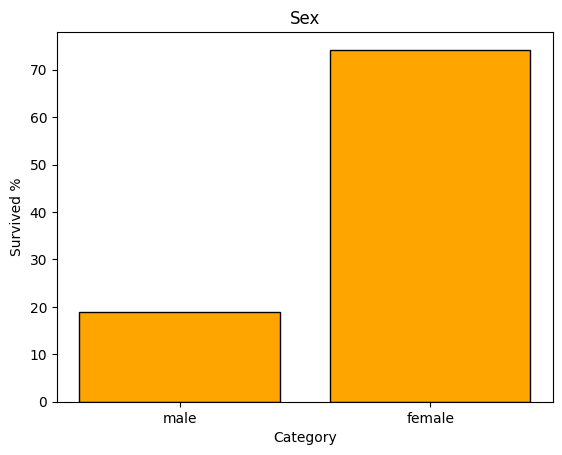

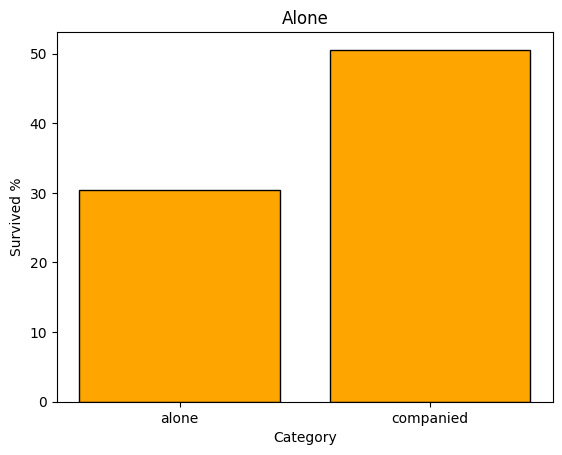

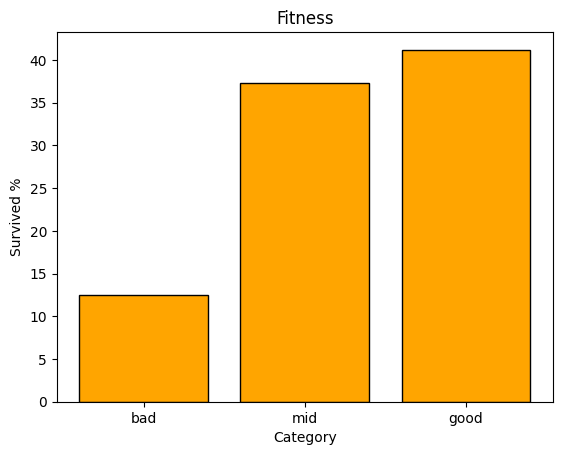

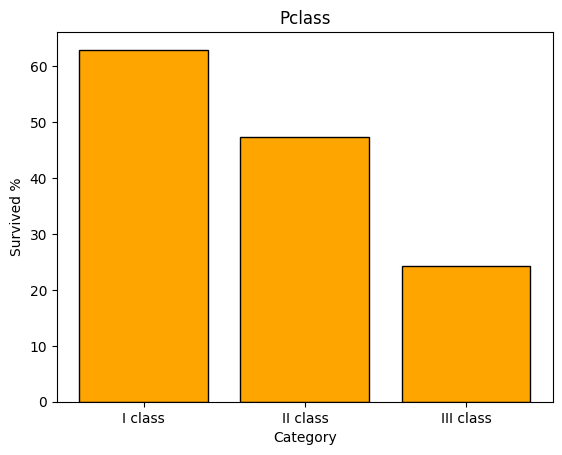

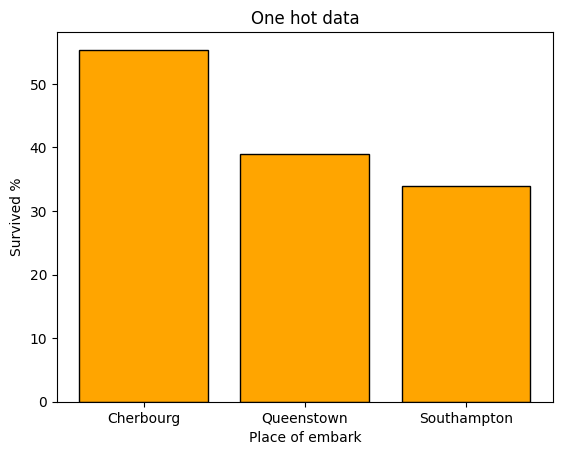

In [23]:
def get_percentage_survived(df, column, value):
  surived_count = df.loc[df[column] == value, 'Survived'].sum()
  total_count = df.loc[df[column] == value, 'Survived'].shape[0]
  survived_perc = np.round((surived_count/ total_count) * 100, 2)
  return survived_perc

def plot_percentage_survived_categorical(df, column, map):

  values = []
  categories = []
  for category, value in map.items():
    values.append(value)
    categories.append(category)

  values = [get_percentage_survived(df, column, value) for value in values]

  plt.bar(categories, values, color='orange', edgecolor='black')
  plt.title(column)
  plt.xlabel('Category')
  plt.ylabel('Survived %')
  plt.show()


sex_map = {'male': False, 'female': True}
plot_percentage_survived_categorical(df, 'Sex', sex_map)

alone_map = {'alone': True, 'companied': False}
plot_percentage_survived_categorical(df, 'Alone', alone_map)

fitness_map = {'bad': 0, 'mid': 1, 'good': 2}
plot_percentage_survived_categorical(df, 'Fitness', fitness_map)

pclass_map = {'I class': 1, 'II class': 2, 'III class': 3}
plot_percentage_survived_categorical(df, 'Pclass', pclass_map)

def plot_one_hot_category_survived(df, map, xlabel = 'categories'):

  categories = []
  columns = []

  for category, column in map.items():
    categories.append(category)
    columns.append(column)

  values = [get_percentage_survived(df, column, True) for column in columns]

  plt.bar(categories, values, color='orange', edgecolor='black')
  plt.title('One hot data')
  plt.xlabel(xlabel)
  plt.ylabel('Survived %')
  plt.show()

embarked_map = {'Cherbourg': 'Embarked_C', 'Queenstown': 'Embarked_Q', 'Southampton': 'Embarked_S'}

plot_one_hot_category_survived(df, embarked_map, 'Place of embark')


Na powyższych wykresach widać wiele ciekawych zależności

*   Zdecydowanie większy procent kobiet niż mężczyzn przeżył katastrofę
*   Bycie w towarzystwie bliskich na pokładzie zwiększało szanse na przeżycie
*   Większa część osób w złej kondycji fizycznej, niż z innymi wartościami Fitness, nie przeżyło katastrofy
*   Procent osób które przeżył jest największy wśród pasażerów I klasy, mniejszy wśród pasażerów II klasy i najmniejszy dla klasy III
*   Procent osób które przetrwało jest zauważalnie większy wśród osób dołączającyh do rejsu w Cherbourg niż w innych miejscowościach



3. **Zależność przeżywalności od danych numerycznych**

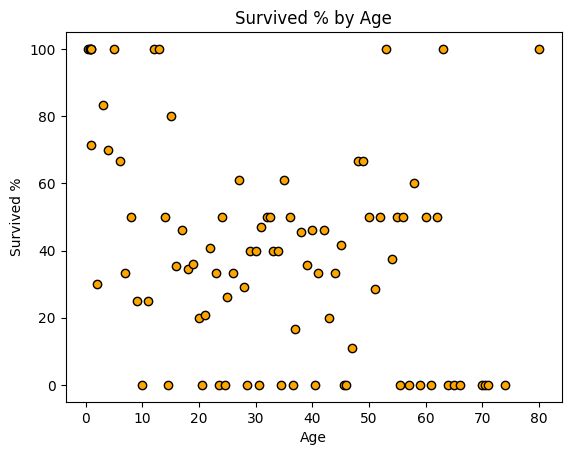

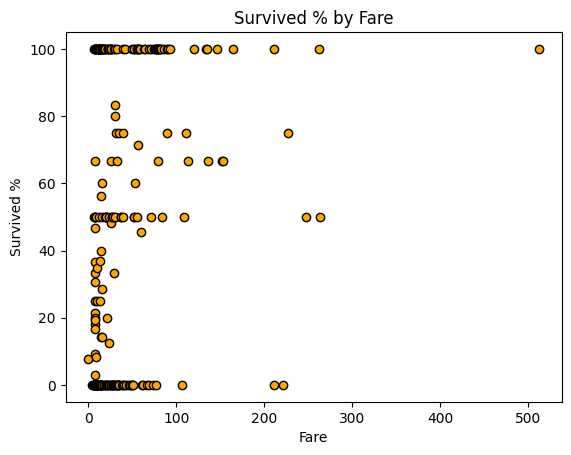

In [32]:
def plot_percentage_survived_numerical(df, column):
  data = df[column]

  x_list = data.unique()
  x_list.sort()

  survived_percantage = [get_percentage_survived(df, column, x) for x in x_list]

  plt.scatter(x_list, survived_percantage, color='orange', edgecolor='black')
  plt.title(f'Survived % by {column}')
  plt.xlabel(column)
  plt.ylabel('Survived %')
  plt.show()

plot_percentage_survived_numerical(df, 'Age')
plot_percentage_survived_numerical(df, 'Fare')


4. **Rozkład danych numerycznych i poszukiwania outlinerów**

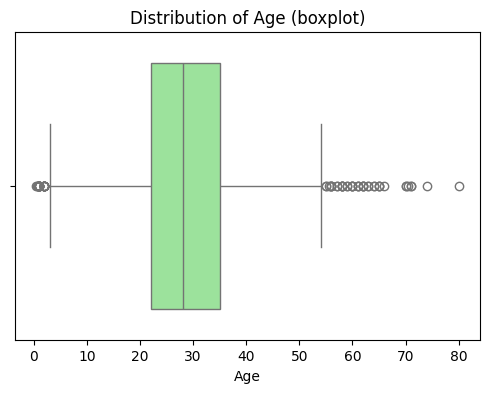

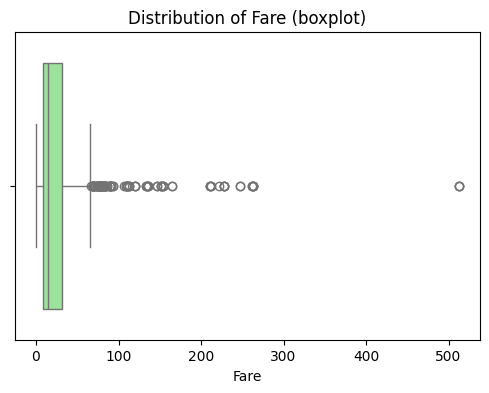

In [33]:
def boxplot(df, column_name):

  plt.figure(figsize=(6, 4))
  sns.boxplot(x=df[column_name].dropna(), color='lightgreen')
  plt.title(f'Distribution of {column_name} (boxplot)')
  plt.xlabel(column_name)

  plt.show()

boxplot(df, 'Age')
boxplot(df, 'Fare')

W obu numerycznych kategoriach, pojawiają się liczne outlinery, a rozkłady nie są symetryczne.

5. **Rozkład danych kategorialnych**

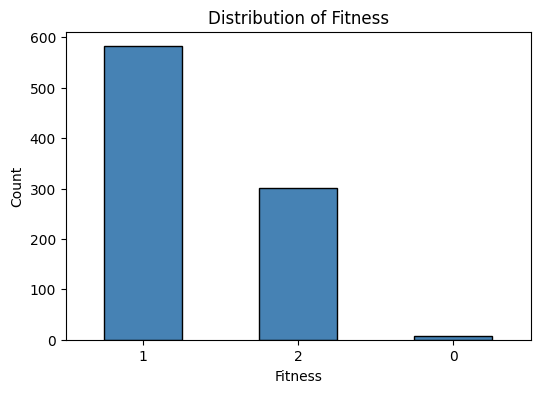

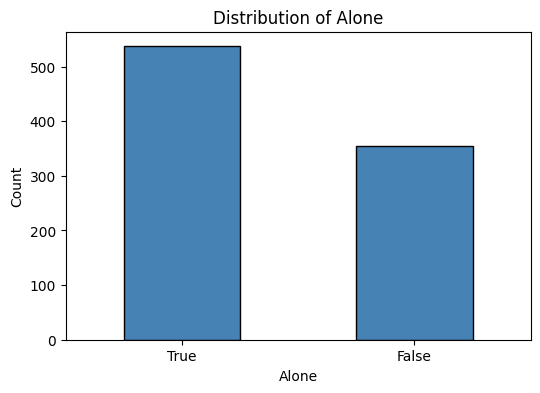

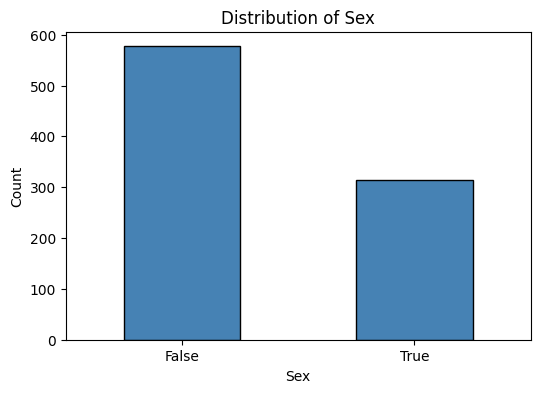

In [35]:
plot_categorical_column(df, 'Fitness')
plot_categorical_column(df, 'Alone')
plot_categorical_column(df, 'Sex')

W kategorii Fitness wartość 0 (old) pojawia się niezwykle rzadko.